# ANÁLISIS DE DATOS MEDIANTE ANÁLISIS MULTIVARIANTE Y PRINICPIOS DE APRENDIZAJE DE MÁQUINA
## Por: Carlos Peña y Florencio Peralta
Este dataset está basado en: COVID19_analytics_clinical_data
https://www.covidanalytics.io/dataset

In [2]:
import numpy as np
import pandas as pd
import statistics as stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MaxAbsScaler,MinMaxScaler,Normalizer,RobustScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#para las graficas 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
%matplotlib inline

Para lo que viene siendo el estudio del dataset se tuvo que agrupar este por sus provincias y por los grupos definidos entro del estudio del dataset original. Dando un total de 3 dataset a trabajar.
Otra cosa mas que se tiene que recalcar es que en el data set original se tuvo que eliminar todo lo que tenga que ver con las revistas que publicaron los datos ya que no tiene que ver con lo que se busca estudiar.

In [3]:
df=pd.read_csv("3.COVID19_analytics_clinical_data.csv",sep=',')
df

,Country,Province/State,Study Pop Size (N),Proportion of values entered in row (%),Study Type: Observational or Randomized Clinical Trial (RCT)?,Study length (days),Overall study population or subgroup?,Subgroup,Positive/negative cases,Survivors,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
0,China,Wuhan,191,0.6011,Observational,33.0,Top-level,General,Positive only,Both,...,0.1152,0.0890,1.0,0.26,0.72,8.0,11.0,20.0,0.28,0.28
1,China,Wuhan,54,0.6011,Observational,33.0,Subgroup,Non-survivors,Positive only,Non-survivors only,...,0.3704,0.2963,1.0,0.72,0.00,8.0,7.5,7.5,1.00,1.00
2,China,Wuhan,137,0.6011,Observational,33.0,Subgroup,Survivors,Positive only,Survivors only,...,0.0146,0.0073,1.0,0.08,1.00,7.0,12.0,20.0,0.00,0.00
3,China,Wuhan,199,0.4494,RCT,16.0,Top-level,General,Positive only,Both,...,NaN,NaN,1.0,NaN,0.72,10.0,15.0,28.0,0.16,0.18
4,China,Wuhan,99,0.4494,RCT,16.0,Subgroup,With treatment,Positive only,Both,...,NaN,NaN,1.0,NaN,0.75,6.0,14.0,28.0,0.15,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,USA,Georgia,89,0.2360,Observational,19.0,Subgroup,Age 18-49,Positive only,NaN,...,NaN,NaN,1.0,0.27,0.96,7.0,7.0,NaN,0.03,0.03
534,USA,Georgia,99,0.2360,Observational,19.0,Subgroup,Age 50-64,Positive only,NaN,...,NaN,NaN,1.0,0.32,0.84,8.0,8.0,NaN,0.10,0.10
535,USA,Georgia,117,0.2303,Observational,19.0,Subgroup,Age 65+,Positive only,NaN,...,NaN,NaN,1.0,0.54,0.56,9.0,10.0,NaN,0.36,0.39
536,USA,Georgia,247,0.2584,Observational,19.0,Subgroup,Black Race,Positive only,NaN,...,NaN,NaN,1.0,0.39,0.78,8.0,8.0,NaN,0.16,0.17


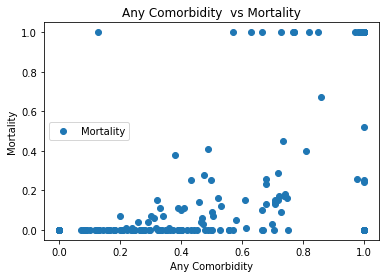

In [4]:
df.plot(x='Any Comorbidity', y='Mortality', style='o') 
plt.title('Any Comorbidity  vs Mortality') 
plt.xlabel('Any Comorbidity') 
plt.ylabel('Mortality') 
plt.savefig('Fig1.png', dpi = 300)
plt.show()

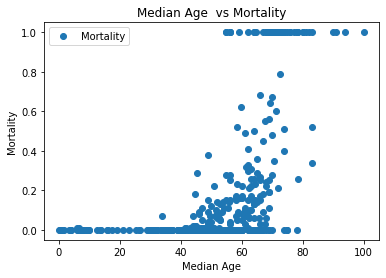

In [5]:
df.plot(x='Median Age', y='Mortality', style='o') 
plt.title('Median Age  vs Mortality') 
plt.xlabel('Median Age') 
plt.ylabel('Mortality')
plt.savefig('Fig2.png', dpi = 300)
plt.show()

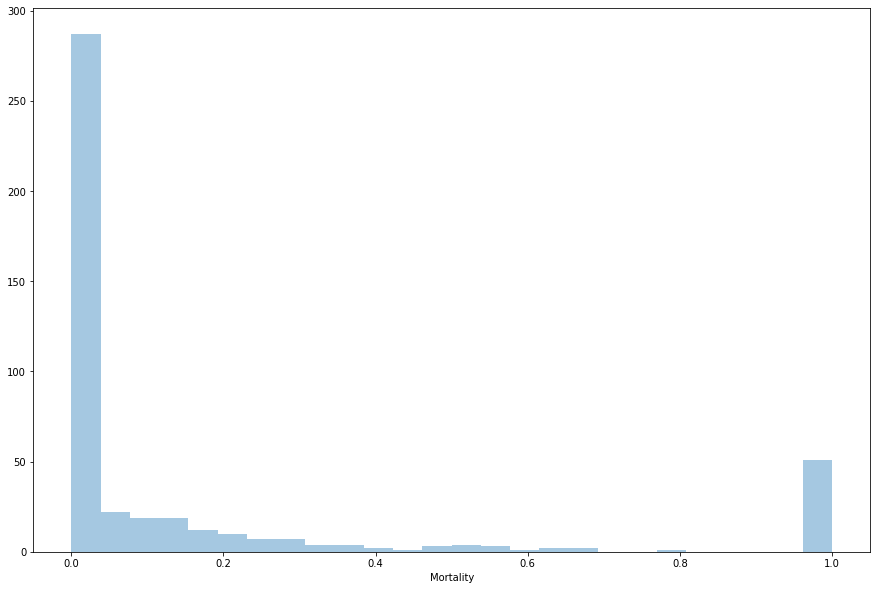

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.savefig('Fig3.png', dpi = 300)
seabornInstance.distplot(df['Mortality'],kde=False)

SE cambiaron los vacios por unknown
se definieron las variables nominales y ordinales
Y por ultimo se realiza la separacion de los dos dataset mas a usar en el estudio

In [8]:
df['Province/State'] = df['Province/State'].fillna('Unknown')
df['Study Type: Observational or Randomized Clinical Trial (RCT)?'] = df['Study Type: Observational or Randomized Clinical Trial (RCT)?'].fillna('Unknown')
df['Subgroup'] = df['Subgroup'].fillna('Unknown')
df['Positive/negative cases'] = df['Positive/negative cases'].fillna('Unknown')
df['Survivors'] = df['Survivors'].fillna('Unknown')
df['Discharged'] = df['Discharged'].fillna('Unknown')
df['Contains Any Treatment?'] = df['Contains Any Treatment?'].fillna('Unknown')
df['ICU vs. non-ICU'] = df['ICU vs. non-ICU'].fillna('Unknown')
df['Severity'] = df['Severity'].fillna('Unknown')
df['Ventilation'] = df['Ventilation'].fillna('Unknown')
df['Ventilation'] = df['Ventilation'].replace({"ÎÎ‘":'Unknown'})

ordinales=['Study Pop Size (N)','Proportion of values entered in row (%)','Study length (days)','Median Age','Mean Age','Age SD','Age LQ',
          'Age UQ','% Healthcare Worker','% Male','% White or European','% African American','% Asian','% Hispanic or Latino',
          '% Multiple ethnicities or other','Exposure history (%)','Exposure - Wuhan Travel (%)','Exposure - Personal Contact (%)',
          'Incubation period (days) - Mean','Incubation period (days) - Median','Incubation period (days) - LQ','Incubation period (days) -  Higher Quartile',
          'Time From Symptoms Appearance to Hospitalization (days) - Mean','Time From Symptoms Appearance to Hospitalization (days) - Median',
          'Time From Symptoms Appearance to Hospitalization (days) - LQ','Time From Symptoms Appearance to Hospitalization (days) - UQ',
          'Smoking history','Current drinker','BMI','Obesity','Any Comorbidity','Hypertension','Diabetes','Cardiovascular Disease (incl. CAD)',
          'Chronic obstructive lung (COPD)','Cancer (Any)','Liver Disease (any)','Cerebrovascular Disease','Chronic kidney/renal disease',
          'Other','Fever','Average temperature (celsius)','Max temperature (celsius)','Respiratory rate > 24 breaths per min',
          'Cough','Shortness of Breath (dyspnoea)','Headache','Sputum (/Expectoration)','Myalgia (Muscle Pain)','Fatigue',
          'Upper air-way congestion','Diarrhoea','Nausea or Vomiting','Loss of Appetite/Anorexia','Sore Throat/Stuffy Nose',
          'Chills','Chest Pain','Loss of smell/taste','Disease Severity Asymptomatic','Disease Severity General','Disease Severity Severe',
          'Disease Severity Critical','Imaging Findings Available? (yes=1, no=0)','White Blood Cell Count (10^9/L) - Median',
          'White Blood Cell Count (10^9/L) - LQ','White Blood Cell Count (10^9/L) - UQ','Lymphocyte Count (10^9/L) - Median',
          'Lymphocyte Count (10^9/L) - LQ','Lymphocyte Count (10^9/L) - UQ','CD4+ T Lymphocyte (Count)','CD8+ T Lymphocyte (Count)',
           'Platelet Count (10^9/L) - Median','Platelet Count (10^9/L) - LQ','Platelet Count (10^9/L) - UQ','Neutrophil Count (10^9/L) - Median',
          'Neutrophil Count (10^9/L) - LQ','Neutrophil Count (10^9/L) - UQ','Hemoglobin (g/L) - Median','Hemoglobin (g/L) - LQ','Hemoglobin (g/L) - UQ',
          'Hematocrit (%)','Albumin (g/L)','Alanine Aminotransferase (U/L)','Aspartate Aminotransferase (U/L)',
           'Total Bilirubin (umol/L) - Median','Total Bilirubin (umol/L) - LQ','Total Bilirubin (umol/L) - UQ','Blood Urea Nitrogen (mmol/L)',
          'Creatinine','Creatine Kinase (U/L)','C-Reactive Protein (mg/L)','Gamma-Glutamyl Transferase (U/L)','Interleukin-6 (pg/mL)',
          'Procalcitonin (ng/mL)','D-Dimer (mg/L)','Prothrombin Time (s)','Antibiotic','Antiviral (Any)','Uses Kaletra','Uses Favipiravir',
          'Uses Tamiflu (oseltamivir)','Uses Remdesivir','Uses umif+lop-rit','Uses Arbidol (umifenovir)','Uses hydroxychloroquine and/or chloroquine',
          'Corticosteroid (including Glucocorticoid, Methylprednisolone)','Intravenous immunoglobin','Nasal cannula','High-flow nasal cannula oxygen therapy',
          'Oxygen therapy','Noninvasive mechanical ventilation','Invasive mechanical ventilation','ECMO','Renal replacement therapy','Interferon Alpha-1b',
          'Thymalfasin and/or Thymosin','Sepsis','Respiratory failure or ARDS','Respiratory failure','ARDS','Hypoxemia','Heart failure',
          'Septic shock / shock','Liver dysfunction','Coagulopathy','Acute cardiac injury','Acute kidney injury (AKI)','Secondary infection/ Bacterial infection',
          'Hypoproteinaemia','Acidosis','Hospital admission (%)','ICU admission','Discharged (%)','ICU length of stay, days','Hospital length of stay, days',
          'Days to Viral Clearance (Median)','Mortality','Projected Mortality (accounting for patients not currently discharged)']

nominales=['Country','Province/State','Study Type: Observational or Randomized Clinical Trial (RCT)?','Overall study population or subgroup?',
          'Subgroup','Positive/negative cases','Survivors','Discharged','Contains Any Treatment?','ICU vs. non-ICU','Severity','Ventilation']

### Dataset de grupos

In [8]:
#DatasetPrGroutp=df.groupby('Subgroup').mean()
#DatasetPrGroutp.to_csv('csvDatasetGrupos.csv')

In [9]:
#df = df.reset_index()
df=pd.read_csv("csvDatasetGrupos.csv",sep=',')
df

,Subgroup,Study Pop Size (N),Proportion of values entered in row (%),Study length (days),Median Age,Mean Age,Age SD,Age LQ,Age UQ,% Healthcare Worker,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
0,10yo Man (C7),1.0,0.5225,13.0,10.0000,10.0000,12.5051,10.0000,10.0000,0.1951,...,0.0498,0.0495,1.0000,0.0000,1.00,6.9554,7.0000,14.9137,0.17,0.0000
1,13 Family clusters,37.0,0.2528,26.0,58.0000,54.6500,16.3000,48.0000,78.0000,0.1951,...,0.0498,0.0495,0.3800,0.0800,0.03,6.9554,15.3569,14.9137,0.00,0.0000
2,19yo Man (C2),1.0,0.5281,15.0,19.0000,19.0000,12.5051,19.0000,19.0000,0.1951,...,0.0498,0.0495,0.9475,0.3354,1.00,6.9554,9.0000,14.9137,0.00,0.0000
3,32yo Man (C1),1.0,0.5281,15.0,32.0000,32.0000,12.5051,32.0000,32.0000,0.1951,...,0.0498,0.0495,0.9475,0.3354,1.00,6.9554,7.0000,14.9137,0.00,0.0000
4,35yo Man (C8),1.0,0.5056,13.0,35.0000,35.0000,12.5051,35.0000,35.0000,0.1951,...,0.0498,0.0495,1.0000,0.0000,0.00,6.9554,15.3569,14.9137,0.17,0.2327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Without fever/cough/shortness of breath,8.0,0.2247,14.0,52.2121,50.7516,12.5051,43.5597,60.5411,1.0000,...,0.0498,0.0495,0.0000,0.0000,0.00,6.9554,15.3569,14.9137,0.00,0.0000
238,Young,38.0,0.4494,45.0,47.0000,50.7516,12.5051,35.7500,51.2500,0.1951,...,0.0498,0.0495,1.0000,0.3354,0.95,6.9554,15.3569,14.9137,0.05,0.0500
239,Young Adults (25-35 yrs),32.0,0.5562,29.0,30.0000,50.7516,12.5051,43.5597,60.5411,0.1951,...,0.0000,0.0000,1.0000,0.3354,0.75,6.9554,15.3569,12.5000,0.00,0.0000
240,ive,2.0,0.2809,36.0,31.0000,50.7516,12.5051,18.0000,44.0000,0.1951,...,0.0498,0.0495,1.0000,0.0000,1.00,6.9554,8.0000,3.0000,0.00,0.0000


Realizado el preprosesado de los datos de la misma forma que el datase original

In [40]:
ordinales=['Study Pop Size (N)','Proportion of values entered in row (%)','Study length (days)','Median Age','Mean Age','Age SD','Age LQ',
          'Age UQ','% Healthcare Worker','% Male','% White or European','% African American','% Asian','% Hispanic or Latino',
          '% Multiple ethnicities or other','Exposure history (%)','Exposure - Wuhan Travel (%)','Exposure - Personal Contact (%)',
          'Incubation period (days) - Mean','Incubation period (days) - Median','Incubation period (days) - LQ','Incubation period (days) -  Higher Quartile',
          'Time From Symptoms Appearance to Hospitalization (days) - Mean','Time From Symptoms Appearance to Hospitalization (days) - Median',
          'Time From Symptoms Appearance to Hospitalization (days) - LQ','Time From Symptoms Appearance to Hospitalization (days) - UQ',
          'Smoking history','Current drinker','BMI','Obesity','Any Comorbidity','Hypertension','Diabetes','Cardiovascular Disease (incl. CAD)',
          'Chronic obstructive lung (COPD)','Cancer (Any)','Liver Disease (any)','Cerebrovascular Disease','Chronic kidney/renal disease',
          'Other','Fever','Average temperature (celsius)','Max temperature (celsius)','Respiratory rate > 24 breaths per min',
          'Cough','Shortness of Breath (dyspnoea)','Headache','Sputum (/Expectoration)','Myalgia (Muscle Pain)','Fatigue',
          'Upper air-way congestion','Diarrhoea','Nausea or Vomiting','Loss of Appetite/Anorexia','Sore Throat/Stuffy Nose',
          'Chills','Chest Pain','Loss of smell/taste','Disease Severity Asymptomatic','Disease Severity General','Disease Severity Severe',
          'Disease Severity Critical','Imaging Findings Available? (yes=1, no=0)','White Blood Cell Count (10^9/L) - Median',
          'White Blood Cell Count (10^9/L) - LQ','White Blood Cell Count (10^9/L) - UQ','Lymphocyte Count (10^9/L) - Median',
          'Lymphocyte Count (10^9/L) - LQ','Lymphocyte Count (10^9/L) - UQ','CD4+ T Lymphocyte (Count)','CD8+ T Lymphocyte (Count)',
           'Platelet Count (10^9/L) - Median','Platelet Count (10^9/L) - LQ','Platelet Count (10^9/L) - UQ','Neutrophil Count (10^9/L) - Median',
          'Neutrophil Count (10^9/L) - LQ','Neutrophil Count (10^9/L) - UQ','Hemoglobin (g/L) - Median','Hemoglobin (g/L) - LQ','Hemoglobin (g/L) - UQ',
          'Hematocrit (%)','Albumin (g/L)','Alanine Aminotransferase (U/L)','Aspartate Aminotransferase (U/L)',
           'Total Bilirubin (umol/L) - Median','Total Bilirubin (umol/L) - LQ','Total Bilirubin (umol/L) - UQ','Blood Urea Nitrogen (mmol/L)',
          'Creatinine','Creatine Kinase (U/L)','C-Reactive Protein (mg/L)','Gamma-Glutamyl Transferase (U/L)','Interleukin-6 (pg/mL)',
          'Procalcitonin (ng/mL)','D-Dimer (mg/L)','Prothrombin Time (s)','Antibiotic','Antiviral (Any)','Uses Kaletra','Uses Favipiravir',
          'Uses Tamiflu (oseltamivir)','Uses Remdesivir','Uses umif+lop-rit','Uses Arbidol (umifenovir)','Uses hydroxychloroquine and/or chloroquine',
          'Corticosteroid (including Glucocorticoid, Methylprednisolone)','Intravenous immunoglobin','Nasal cannula','High-flow nasal cannula oxygen therapy',
          'Oxygen therapy','Noninvasive mechanical ventilation','Invasive mechanical ventilation','ECMO','Renal replacement therapy','Interferon Alpha-1b',
          'Thymalfasin and/or Thymosin','Sepsis','Respiratory failure or ARDS','Respiratory failure','ARDS','Hypoxemia','Heart failure',
          'Septic shock / shock','Liver dysfunction','Coagulopathy','Acute cardiac injury','Acute kidney injury (AKI)','Secondary infection/ Bacterial infection',
          'Hypoproteinaemia','Acidosis','Hospital admission (%)','ICU admission','Discharged (%)','ICU length of stay, days','Hospital length of stay, days',
          'Days to Viral Clearance (Median)','Mortality','Projected Mortality (accounting for patients not currently discharged)']

nominales=['Subgroup']

preprocesador = make_column_transformer(
                 (StandardScaler(),ordinales),
                 (OneHotEncoder(),nominales)
                )
X = preprocesador.fit_transform(df)
cnamesDataset1 = ordinales
cnamesDataset2=preprocesador.transformers_[1][1].get_feature_names(nominales)
cnamesDataset1.extend(cnamesDataset2)
DatasetPreprocesado = pd.DataFrame(data=X,columns=cnamesDataset1)
DatasetPreprocesado['Mortality']=df['Mortality']

correlacion=DatasetPreprocesado.corr()
pd.set_option('display.max_rows', None)
corMorta=correlacion['Mortality']
corMorta

Study Pop Size (N)                                                       -0.048027
Proportion of values entered in row (%)                                  -0.082893
Study length (days)                                                      -0.019434
Median Age                                                                0.539739
Mean Age                                                                  0.460300
Age SD                                                                   -0.243633
Age LQ                                                                    0.588388
Age UQ                                                                    0.347688
% Healthcare Worker                                                      -0.075304
% Male                                                                   -0.047214
% White or European                                                       0.043014
% African American                                                        0.037516
% As

In [11]:
sorted(corMorta, reverse = True)

[1.0,
 0.8966741654982653,
 0.6201594433083413,
 0.5883881435392971,
 0.5397389027915803,
 0.4603004165899536,
 0.4038774593481369,
 0.3756258141907892,
 0.34768812775480085,
 0.3367459249951881,
 0.3319728329623936,
 0.30553374335748296,
 0.30016533522644384,
 0.29651663790360105,
 0.29326577815260974,
 0.2912230508484895,
 0.2865874486967286,
 0.2537641550411348,
 0.24111716337967448,
 0.24007872892926785,
 0.2378709095891479,
 0.23513604539483277,
 0.2333435684469696,
 0.2328682887640119,
 0.22850596834796583,
 0.22710779660670558,
 0.2212561110364347,
 0.22033369364776725,
 0.21951614990599339,
 0.20025997612219779,
 0.1996994517839452,
 0.19798163187411652,
 0.19306148585119404,
 0.19252434416772726,
 0.18070156111043503,
 0.17712303377351865,
 0.17511116655976522,
 0.17511116655976522,
 0.1751111665597652,
 0.1751111665597652,
 0.1751111665597652,
 0.17511116655976516,
 0.17511116655976514,
 0.1751111665597651,
 0.1751111665597651,
 0.1751111665597651,
 0.1751111665597651,
 0.175

In [41]:
X = df['Any Comorbidity'].values.reshape(-1,1)
y = df['Mortality'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
dfreg = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfreg.head(5)

,Actual,Predicted
0,0.00,-0.100611
1,1.00,0.534506
2,0.15,0.253799
3,1.00,0.167644
4,0.00,0.167644


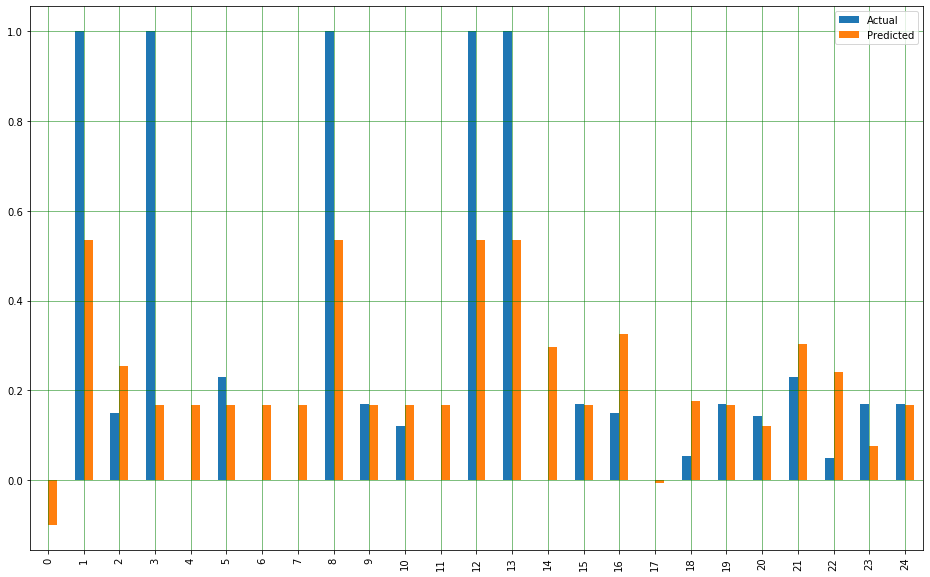

In [42]:
df1 = dfreg.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('Fig4.png', dpi = 300)
plt.show()

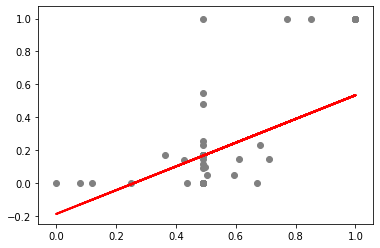

In [14]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.savefig('Fig5.png', dpi = 300)
plt.show()

In [48]:
# Remplasar estas graficas por los valores de accuracy que tienen 


from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1915074921399857
Mean Squared Error: 0.07291499361997397
Root Mean Squared Error: 0.2700277645353788


In [65]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
pf = PolynomialFeatures(degree = 2)   

Xcuad = pf.fit_transform(X_train) 
XtestC = pf.fit_transform(X_test) 

regresion_lineal = LinearRegression() 

regresion_lineal.fit(Xcuad, y_train) 

y_predcua = regresion_lineal.predict(XtestC)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predcua))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predcua))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predcua)))

Mean Absolute Error: 0.16174701863036392
Mean Squared Error: 0.05527262420125242
Root Mean Squared Error: 0.23510130625169315


In [71]:
pf = PolynomialFeatures(degree = 4)   

Xcuad = pf.fit_transform(X_train) 
XtestC = pf.fit_transform(X_test) 

regresion_lineal = LinearRegression() 

regresion_lineal.fit(Xcuad, y_train) 

y_predcua = regresion_lineal.predict(XtestC)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predcua))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predcua))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predcua)))

Mean Absolute Error: 0.1560831051487369
Mean Squared Error: 0.056729701015784555
Root Mean Squared Error: 0.23817997610165417


In [80]:
#Median Age
X = df['Any Comorbidity'].values.reshape(-1,1)
y = df['Median Age'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
dfreg = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfreg.head(5)


,Actual,Predicted
0,47.25,40.212317
1,67.00,71.128982
2,56.00,57.464545
3,70.00,53.270614
4,59.00,53.270614


In [81]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.1396629258162205
Mean Squared Error: 83.01799143466518
Root Mean Squared Error: 9.111420933897477


In [82]:
pf = PolynomialFeatures(degree = 2)   

Xcuad = pf.fit_transform(X_train) 
XtestC = pf.fit_transform(X_test) 

regresion_lineal = LinearRegression() 

regresion_lineal.fit(Xcuad, y_train) 

y_predcua = regresion_lineal.predict(XtestC)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predcua))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predcua))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predcua)))

Mean Absolute Error: 7.121135223429943
Mean Squared Error: 82.77380775392464
Root Mean Squared Error: 9.098011197724734


In [83]:
pf = PolynomialFeatures(degree = 4)   

Xcuad = pf.fit_transform(X_train) 
XtestC = pf.fit_transform(X_test) 

regresion_lineal = LinearRegression() 

regresion_lineal.fit(Xcuad, y_train) 

y_predcua = regresion_lineal.predict(XtestC)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predcua))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predcua))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predcua)))

Mean Absolute Error: 7.036431584965548
Mean Squared Error: 81.07399307964941
Root Mean Squared Error: 9.004109788293865


Realizada la estadistica descriptiva

In [115]:
DatasetPreprocesado.head(5)

,Study Pop Size (N),Proportion of values entered in row (%),Study length (days),Median Age,Mean Age,Age SD,Age LQ,Age UQ,% Healthcare Worker,% Male,...,Subgroup_WPH,Subgroup_With Cardiac Injury,Subgroup_With fever/cough/shortness of breath,Subgroup_With treatment,Subgroup_Without Cardiac Injury,Subgroup_Without fever/cough/shortness of breath,Subgroup_Young,Subgroup_Young Adults (25-35 yrs),Subgroup_ive,Subgroup_no severe comorbidities
0,-0.098406,1.536799,-1.214975,-3.190554,-4.255147,-0.028787,-2.570847,-4.089082,-0.085375,2.007005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.090819,-0.908846,-0.488112,0.288810,0.223553,0.446400,0.171419,1.268797,-0.085375,-0.251934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.098406,1.587580,-1.103150,-2.538174,-3.352385,-0.028787,-1.921363,-3.379951,-0.085375,2.007005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.098406,1.587580,-1.103150,-1.595846,-2.048397,-0.028787,-0.983220,-2.355651,-0.085375,2.007005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.098406,1.383550,-1.214975,-1.378386,-1.747476,-0.028787,-0.766725,-2.119274,-0.085375,2.007005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Proceso de Clustering con K-means y metodo del codo

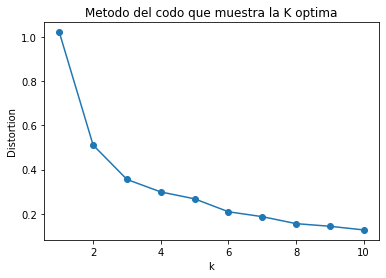

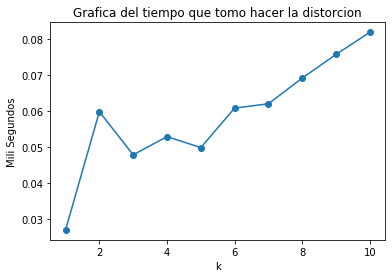

In [118]:
import time
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler,Normalizer
x=DatasetPreprocesado
x = MinMaxScaler().fit_transform(x)
X = np.array(list(zip(x[0], x[1]))).reshape(len(x[0]), 2)
def mejorK(X, Kmax):
    distortions = []
    K = range(1,Kmax+1)
    tiempoT=[]
    for k in K:
        tiempoIni=time.time()
        kmeanModel = KMeans(n_clusters=k, init='k-means++').fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'seuclidean'), axis=1)) / X.shape[0])
        tiempoFin= time.time()
        tiempoT.append(tiempoFin-tiempoIni)
    plt.plot(K, distortions, 'o-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Metodo del codo que muestra la K optima')
    plt.savefig('Fig6.png', dpi = 300)
    plt.show()
    plt.figure()
    plt.plot(K, tiempoT, 'o-')
    plt.xlabel('k')
    plt.ylabel('Mili Segundos')
    plt.title('Grafica del tiempo que tomo hacer la distorcion')
    plt.savefig('Fig7.png', dpi = 300)
mejorK(X,10)

In [119]:
from sklearn.decomposition import PCA
num_components=4
pca = PCA(num_components)
principalComponents = pca.fit_transform(x)

#The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.
explained_variance=pca.explained_variance_ratio_
explained_variance
print('Varianzas:')
print(np.around(explained_variance, decimals=3))
a = range(num_components)
num_pc= a[::1]
principalDf = pd.DataFrame(data = principalComponents
             , columns = num_pc)
principalDf=round(principalDf, 2)

Varianzas:
[0.106 0.054 0.049 0.038]


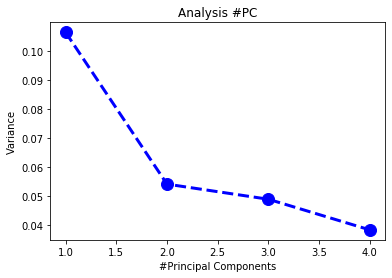

,0,1,2,3
0,1.0,-0.0,-0.0,-0.0
1,-0.0,1.0,0.0,-0.0
2,-0.0,0.0,1.0,0.0
3,-0.0,-0.0,0.0,1.0


In [120]:
a = range(num_components)
num_pc= np.linspace(1,num_components,num_components)

import matplotlib.pyplot as plt

plt.plot(num_pc, explained_variance, color='blue', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('Analysis #PC')
plt.xlabel('#Principal Components')
plt.ylabel('Variance')
plt.savefig('Fig8.png', dpi = 300)
plt.show()
correl=principalDf.corr()
correl=round(correl,2)
correl

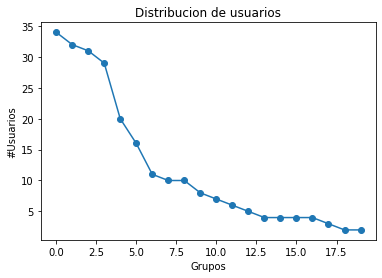

In [121]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

#Kmeans Clustering 
def doKmeans(X, nclust=2, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full'):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)
clust_labels, cent = doKmeans(principalDf, 20, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full' )
#kmeans = pd.DataFrame(clust_labels)
kmeans = pd.DataFrame(clust_labels,columns=['Grupos'])
UserGrupoK=kmeans.groupby(kmeans.Grupos).Grupos.count()

UserGrupoK=UserGrupoK.sort_values(ascending=False, inplace=False, kind='quicksort')
#UserGrupoK.sort_values(by='values', axis=1, ascending=False, inplace=False, kind='quicksort')
UserGrupoK
grupo=UserGrupoK.index.tolist()
valores=UserGrupoK.values.tolist()

plt.rcParams.update({'font.size': 10})
plt.plot(range(len(grupo)), valores, marker='o')
plt.title("Distribucion de usuarios")
plt.xlabel("Grupos")
plt.ylabel("#Usuarios")
plt.savefig('Fig9.png', dpi = 300)
plt.show()

In [122]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

from sklearn.cluster import KMeans

def doKmeans(X, nclust=4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(principalDf, 4)
kmeans = pd.DataFrame(clust_labels)
kmeans

,0
0,3
1,0
2,3
3,3
4,3
5,3
6,0
7,3
8,3
9,3


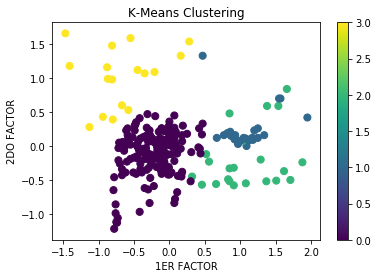

In [124]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf[0],principalDf[1],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
plt.savefig('Fig10.png', dpi = 300)
plt.colorbar(scatter)

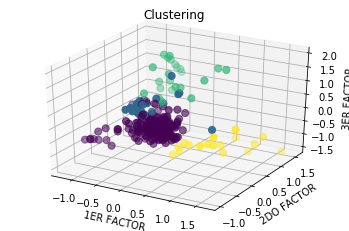

In [125]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure()
ax = plt.subplot(1,1,1,projection='3d')

zline = np.linspace(-5, 5, 11)
xline = np.linspace(0, 10, 11)
yline = np.linspace(0, 15, 11)

zdata = principalDf[0]
xdata = principalDf[1]
ydata = principalDf[2]

ax.set_title('Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
ax.set_zlabel('3ER FACTOR')

ax.scatter(xdata, ydata, zdata
           ,c=kmeans[0]
           ,s=50)
ax.grid()
plt.savefig('Fig11.png', dpi = 300)
plt.show()


Realizada la estadistica descriptiva De los 4 grupos distintos

In [126]:
g=[]
for i in range(len(kmeans)):
    g.append(kmeans[0][i])
np.concatenate((df['Subgroup'], g), axis=0)
gr=pd.DataFrame({"Subgrupos": df['Subgroup'],"Grupo del Clustering al que pertenecen":g})
G0=[]
G1=[]
G2=[]
G3=[]
for i in range(len(gr)):
    te=gr["Grupo del Clustering al que pertenecen"][i]
    if te == 0:
        G0.append(df.iloc[i])
    if te == 1:
        G1.append(df.iloc[i])
    if te == 2:
        G2.append(df.iloc[i])
    if te == 3:
        G3.append(df.iloc[i])
from pandas import DataFrame
dfg0 = DataFrame (G0)
dfg1 = DataFrame (G1)
dfg2 = DataFrame (G2)
dfg3 = DataFrame (G3)
dfg0.describe() 

,Study Pop Size (N),Proportion of values entered in row (%),Study length (days),Median Age,Mean Age,Age SD,Age LQ,Age UQ,% Healthcare Worker,% Male,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,616.107371,0.335304,37.218385,51.704086,50.952844,14.005154,42.041955,61.229340,0.211225,0.517201,...,0.049708,0.049831,0.926771,0.264180,0.599845,6.850165,15.529215,14.900427,0.092086,0.147827
std,5540.170682,0.099028,18.746606,10.889122,6.844073,8.347159,9.900525,10.297988,0.146846,0.125845,...,0.000606,0.005316,0.228597,0.160833,0.288936,1.274302,3.504842,2.081098,0.129912,0.120243
min,1.000000,0.129200,6.000000,3.900000,34.740533,7.145771,1.200000,8.400000,0.000000,0.000000,...,0.044820,0.044550,0.000000,0.000000,0.000000,0.000000,4.100000,3.000000,0.000000,0.000000
25%,17.000000,0.264000,23.250000,45.698881,49.137500,12.505100,38.564849,60.541100,0.195100,0.458075,...,0.049800,0.049500,1.000000,0.161925,0.512400,6.955400,15.260212,14.913700,0.000000,0.000000
50%,50.000000,0.335675,34.961538,52.212100,50.751600,12.505100,43.559700,60.541100,0.195100,0.550300,...,0.049800,0.049500,1.000000,0.335400,0.512400,6.955400,15.356900,14.913700,0.050000,0.176100
75%,115.833333,0.401413,48.250000,58.000000,50.751600,12.505100,44.275456,65.020550,0.195100,0.578254,...,0.049800,0.049500,1.000000,0.335400,0.835000,6.955400,15.356900,14.913700,0.170000,0.232700
max,73522.000000,0.601100,99.000000,83.000000,83.000000,70.000000,75.000000,92.000000,1.000000,1.000000,...,0.049800,0.120000,1.000000,1.000000,1.000000,12.492567,30.000000,28.500000,1.000000,0.625000


In [23]:
dfg1.describe() 

,Study Pop Size (N),Proportion of values entered in row (%),Study length (days),Median Age,Mean Age,Age SD,Age LQ,Age UQ,% Healthcare Worker,% Male,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,616.107371,0.335304,37.218385,51.704086,50.952844,14.005154,42.041955,61.229340,0.211225,0.517201,...,0.049708,0.049831,0.926771,0.264180,0.599845,6.850165,15.529215,14.900427,0.092086,0.147827
std,5540.170682,0.099028,18.746606,10.889122,6.844073,8.347159,9.900525,10.297988,0.146846,0.125845,...,0.000606,0.005316,0.228597,0.160833,0.288936,1.274302,3.504842,2.081098,0.129912,0.120243
min,1.000000,0.129200,6.000000,3.900000,34.740533,7.145771,1.200000,8.400000,0.000000,0.000000,...,0.044820,0.044550,0.000000,0.000000,0.000000,0.000000,4.100000,3.000000,0.000000,0.000000
25%,17.000000,0.264000,23.250000,45.698881,49.137500,12.505100,38.564849,60.541100,0.195100,0.458075,...,0.049800,0.049500,1.000000,0.161925,0.512400,6.955400,15.260212,14.913700,0.000000,0.000000
50%,50.000000,0.335675,34.961538,52.212100,50.751600,12.505100,43.559700,60.541100,0.195100,0.550300,...,0.049800,0.049500,1.000000,0.335400,0.512400,6.955400,15.356900,14.913700,0.050000,0.176100
75%,115.833333,0.401413,48.250000,58.000000,50.751600,12.505100,44.275456,65.020550,0.195100,0.578254,...,0.049800,0.049500,1.000000,0.335400,0.835000,6.955400,15.356900,14.913700,0.170000,0.232700
max,73522.000000,0.601100,99.000000,83.000000,83.000000,70.000000,75.000000,92.000000,1.000000,1.000000,...,0.049800,0.120000,1.000000,1.000000,1.000000,12.492567,30.000000,28.500000,1.000000,0.625000


In [24]:
dfg2.describe() 

,Study Pop Size (N),Proportion of values entered in row (%),Study length (days),Median Age,Mean Age,Age SD,Age LQ,Age UQ,% Healthcare Worker,% Male,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,2.300000e+01,23.0000,23.0,23.000000,23.000000,23.000000,23.000000,2.300000e+01,23.000000,23.000000
mean,106.695652,0.336339,29.826087,63.200000,54.777270,12.309004,56.016483,65.879274,0.189313,0.716270,...,4.980000e-02,0.0495,1.0,0.942209,0.226939,7.267504,14.974965,1.491370e+01,0.340435,0.438883
std,154.374820,0.101015,10.333758,15.028367,7.137291,0.736439,16.046476,15.283419,0.027753,0.269908,...,7.094844e-18,0.0000,0.0,0.191474,0.224619,1.074327,1.266319,3.632560e-15,0.324268,0.296137
min,1.000000,0.191000,13.000000,16.000000,50.751600,9.100000,14.000000,19.000000,0.062000,0.000000,...,4.980000e-02,0.0495,1.0,0.335400,0.000000,6.955400,11.000000,1.491370e+01,0.000000,0.040000
25%,8.500000,0.286500,21.500000,62.000000,50.751600,12.505100,47.000000,60.541100,0.195100,0.650500,...,4.980000e-02,0.0495,1.0,1.000000,0.000000,6.955400,15.356900,1.491370e+01,0.150000,0.232700
50%,52.000000,0.286500,36.000000,65.000000,50.751600,12.505100,56.000000,68.000000,0.195100,0.790000,...,4.980000e-02,0.0495,1.0,1.000000,0.180000,6.955400,15.356900,1.491370e+01,0.170000,0.310000
75%,129.500000,0.396050,36.000000,70.000000,56.875800,12.505100,64.000000,74.800000,0.195100,0.847000,...,4.980000e-02,0.0495,1.0,1.000000,0.456200,6.955400,15.356900,1.491370e+01,0.500000,0.595000
max,598.000000,0.522500,42.000000,91.000000,72.600000,12.505100,91.000000,91.000000,0.195100,1.000000,...,4.980000e-02,0.0495,1.0,1.000000,0.670000,12.000000,17.000000,1.491370e+01,1.000000,1.000000


In [25]:
dfg3.describe() 

,Study Pop Size (N),Proportion of values entered in row (%),Study length (days),Median Age,Mean Age,Age SD,Age LQ,Age UQ,% Healthcare Worker,% Male,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
count,17.000000,17.000000,17.000000,17.00000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000
mean,41.764706,0.536859,15.470588,42.19000,45.366659,11.247429,42.528779,48.395456,0.189362,0.767088,...,0.042476,0.042221,0.987647,0.123671,0.507929,6.955400e+00,13.348582,14.635618,0.070000,0.095818
std,139.190755,0.033225,5.209578,17.71753,16.277734,4.275563,16.739854,17.527038,0.023659,0.356926,...,0.017081,0.016978,0.022955,0.162067,0.463771,1.831027e-15,3.400727,0.785197,0.086241,0.118049
min,1.000000,0.500000,12.000000,10.00000,10.000000,0.000000,10.000000,10.000000,0.097550,0.000000,...,0.000000,0.000000,0.947500,0.000000,0.000000,6.955400e+00,7.000000,12.500000,0.000000,0.000000
25%,1.000000,0.516900,13.000000,32.00000,35.000000,12.505100,32.000000,35.000000,0.195100,0.509500,...,0.049800,0.049500,1.000000,0.000000,0.000000,6.955400e+00,14.000000,14.913700,0.000000,0.000000
50%,1.000000,0.522500,13.000000,44.50000,46.140000,12.505100,39.279850,56.000000,0.195100,1.000000,...,0.049800,0.049500,1.000000,0.000000,0.512400,6.955400e+00,15.356900,14.913700,0.000000,0.000000
75%,1.000000,0.556200,15.000000,56.00000,56.000000,12.505100,56.000000,60.541100,0.195100,1.000000,...,0.049800,0.049500,1.000000,0.335400,1.000000,6.955400e+00,15.356900,14.913700,0.170000,0.232700
max,577.000000,0.601100,29.000000,72.00000,72.000000,14.450000,72.000000,72.000000,0.195100,1.000000,...,0.049800,0.049500,1.000000,0.335400,1.000000,6.955400e+00,15.356900,14.913700,0.170000,0.232700


### Dataset Provincias

In [26]:
#DatasetPrGroutp2=df.groupby('Province/State').mean()
#DatasetPrGroutp2.to_csv('csvDatasetProvincias.csv')

In [127]:
provdf = pd.read_csv ("csvDatasetProvincias.csv")
provdf
ordinales=['Study Pop Size (N)','Proportion of values entered in row (%)','Study length (days)','Median Age','Mean Age','Age SD','Age LQ',
          'Age UQ','% Healthcare Worker','% Male','% White or European','% African American','% Asian','% Hispanic or Latino',
          '% Multiple ethnicities or other','Exposure history (%)','Exposure - Wuhan Travel (%)','Exposure - Personal Contact (%)',
          'Incubation period (days) - Mean','Incubation period (days) - Median','Incubation period (days) - LQ','Incubation period (days) -  Higher Quartile',
          'Time From Symptoms Appearance to Hospitalization (days) - Mean','Time From Symptoms Appearance to Hospitalization (days) - Median',
          'Time From Symptoms Appearance to Hospitalization (days) - LQ','Time From Symptoms Appearance to Hospitalization (days) - UQ',
          'Smoking history','Current drinker','BMI','Obesity','Any Comorbidity','Hypertension','Diabetes','Cardiovascular Disease (incl. CAD)',
          'Chronic obstructive lung (COPD)','Cancer (Any)','Liver Disease (any)','Cerebrovascular Disease','Chronic kidney/renal disease',
          'Other','Fever','Average temperature (celsius)','Max temperature (celsius)','Respiratory rate > 24 breaths per min',
          'Cough','Shortness of Breath (dyspnoea)','Headache','Sputum (/Expectoration)','Myalgia (Muscle Pain)','Fatigue',
          'Upper air-way congestion','Diarrhoea','Nausea or Vomiting','Loss of Appetite/Anorexia','Sore Throat/Stuffy Nose',
          'Chills','Chest Pain','Loss of smell/taste','Disease Severity Asymptomatic','Disease Severity General','Disease Severity Severe',
          'Disease Severity Critical','Imaging Findings Available? (yes=1, no=0)','White Blood Cell Count (10^9/L) - Median',
          'White Blood Cell Count (10^9/L) - LQ','White Blood Cell Count (10^9/L) - UQ','Lymphocyte Count (10^9/L) - Median',
          'Lymphocyte Count (10^9/L) - LQ','Lymphocyte Count (10^9/L) - UQ','CD4+ T Lymphocyte (Count)','CD8+ T Lymphocyte (Count)',
           'Platelet Count (10^9/L) - Median','Platelet Count (10^9/L) - LQ','Platelet Count (10^9/L) - UQ','Neutrophil Count (10^9/L) - Median',
          'Neutrophil Count (10^9/L) - LQ','Neutrophil Count (10^9/L) - UQ','Hemoglobin (g/L) - Median','Hemoglobin (g/L) - LQ','Hemoglobin (g/L) - UQ',
          'Hematocrit (%)','Albumin (g/L)','Alanine Aminotransferase (U/L)','Aspartate Aminotransferase (U/L)',
           'Total Bilirubin (umol/L) - Median','Total Bilirubin (umol/L) - LQ','Total Bilirubin (umol/L) - UQ','Blood Urea Nitrogen (mmol/L)',
          'Creatinine','Creatine Kinase (U/L)','C-Reactive Protein (mg/L)','Gamma-Glutamyl Transferase (U/L)','Interleukin-6 (pg/mL)',
          'Procalcitonin (ng/mL)','D-Dimer (mg/L)','Prothrombin Time (s)','Antibiotic','Antiviral (Any)','Uses Kaletra','Uses Favipiravir',
          'Uses Tamiflu (oseltamivir)','Uses Remdesivir','Uses umif+lop-rit','Uses Arbidol (umifenovir)','Uses hydroxychloroquine and/or chloroquine',
          'Corticosteroid (including Glucocorticoid, Methylprednisolone)','Intravenous immunoglobin','Nasal cannula','High-flow nasal cannula oxygen therapy',
          'Oxygen therapy','Noninvasive mechanical ventilation','Invasive mechanical ventilation','ECMO','Renal replacement therapy','Interferon Alpha-1b',
          'Thymalfasin and/or Thymosin','Sepsis','Respiratory failure or ARDS','Respiratory failure','ARDS','Hypoxemia','Heart failure',
          'Septic shock / shock','Liver dysfunction','Coagulopathy','Acute cardiac injury','Acute kidney injury (AKI)','Secondary infection/ Bacterial infection',
          'Hypoproteinaemia','Acidosis','Hospital admission (%)','ICU admission','Discharged (%)','ICU length of stay, days','Hospital length of stay, days',
          'Days to Viral Clearance (Median)','Mortality','Projected Mortality (accounting for patients not currently discharged)']
varydf = ["Province/State"]
preprocesador1 = make_column_transformer(
            (StandardScaler(),ordinales),
            (OneHotEncoder(),varydf)
            )
X2 = preprocesador1.fit_transform(provdf)
categorical_features = varydf
cnamesDataset1 = ordinales
cnamesDataset2 = preprocesador1.transformers_[1][1].get_feature_names(categorical_features)
cnamesDataset1.extend(cnamesDataset2)
DatasetPreprocesado = pd.DataFrame(data=X2,columns=cnamesDataset1)
DatasetPreprocesado['Mortality'] = provdf['Mortality']
DatasetPreprocesado.head()

,Study Pop Size (N),Proportion of values entered in row (%),Study length (days),Median Age,Mean Age,Age SD,Age LQ,Age UQ,% Healthcare Worker,% Male,...,Province/State_Wuhan,Province/State_Wuhan,Province/State_Xi'an,Province/State_Xiangyang,Province/State_Xiaogan,Province/State_Yichang,Province/State_Zhejiang,Province/State_Zhuhai,Province/State_njing,Province/State_tionwide
0,-0.380663,-0.587211,-0.542480,-0.352371,-0.418701,0.046968,0.310677,0.123581,0.214358,0.170609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.411444,-1.123775,0.281548,-1.309574,0.267463,-0.094985,0.310677,0.123581,-2.844789,-0.099497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.317681,-0.315820,-0.124696,0.223902,0.385635,0.116871,0.230494,0.023837,-0.470709,-0.403171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.078064,-1.171326,0.053036,0.321335,0.409157,-0.060360,-0.128134,0.520515,0.214358,1.620940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.223484,-0.046155,0.186334,0.446420,-0.035654,-0.094985,0.825017,0.587878,0.214358,-0.345284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
DatasetPreprocesado['Mortality'].describe() 

count    57.000000
mean      0.093079
std       0.092904
min       0.000000
25%       0.000000
50%       0.084280
75%       0.169957
max       0.321462
Name: Mortality, dtype: float64

In [129]:
X = DatasetPreprocesado.drop('Mortality', 1)  
y = DatasetPreprocesado['Mortality'] 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [130]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [131]:
#Training
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df.head()

,Coefficient
Study Pop Size (N),0.001313
Proportion of values entered in row (%),-0.005898
Study length (days),0.006520
Median Age,0.027588
Mean Age,0.032073


In [132]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
35,0.000000,-0.082628
34,0.090000,0.141863
41,0.000000,0.070940
27,0.311111,0.266701
11,0.000000,0.185061


In [133]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.06328468403276438
Mean Squared Error: 0.006322767478601251
Root Mean Squared Error: 0.07951583162239612


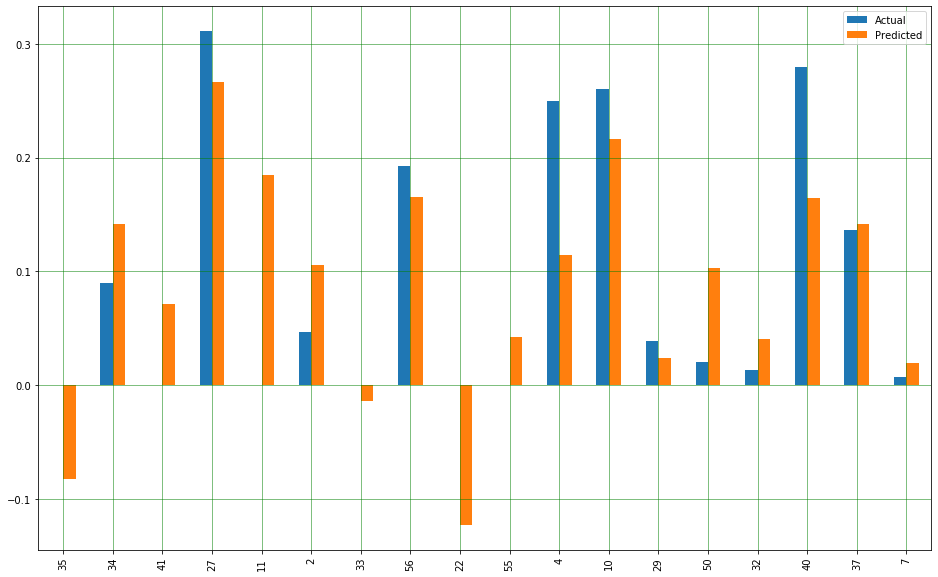

In [135]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('Fig12.png', dpi = 300)
plt.show()


### Concluciones 
Se logro determinar 4 grupos de factores que afectaban a la tasa de mortalidad que produce del covid sobre los grupos del dataset analizados.

Para la parte de predicciones en ves de grupos usamos las provincias en base a su tasa de mortalidad.

La razon por la cual se dividio al dataset en 2 más es para poder obtener una mejor respuesta de la evaluacion de los datos

Se quiso usar un analisis de PCA pero dado a que existia una complicacion con la variable de salida por el tipo de datos que se obtenian se tomo la decicion de hacer una regresion multilineal que permita analizar la tasa de mortalidad deacuerdo a los grupos establecidos en el dataset.
